the goal of clustering is to devide the data into clusters that ares a specfic group and same data goes to the same group there is no target value

for the first in k-means clustering you set the cluster center and after that it will be updated by mean of the difference of the distance and we assing the data in  the same cluster like a dict object

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy


In [3]:
## this is for using it only
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
def plot_labelled_scatter(X, y, class_labels):
    num_labels = len(class_labels)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    marker_array = ['o', '^', '*']
    color_array = ['#FFFF00', '#00AAFF', '#000000', '#FF00AA']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(numpy.arange(0, num_labels + 1, 1), ncolors=num_labels)
    plt.figure()

    plt.scatter(X[:, 0], X[:, 1], s=65, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.40, edgecolor='black', lw = 1)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h)

plt.show()

In [4]:
x,y  = make_blobs(random_state=10)

In [5]:
print x.shape
print y.shape

(100, 2)
(100,)


In [6]:
kmeans = KMeans(n_clusters=3)

In [7]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

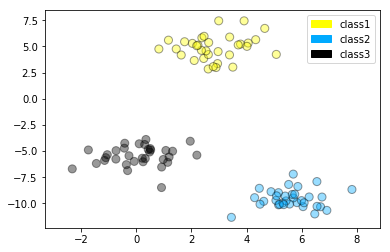

In [8]:
plot_labelled_scatter(x,kmeans.labels_,['class1','class2','class3'])

In [10]:
y

array([2, 2, 1, 0, 1, 1, 0, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 1, 0, 1, 0, 2,
       1, 2, 0, 1, 1, 1, 1, 0, 2, 1, 1, 0, 2, 2, 2, 1, 1, 1, 2, 0, 2, 2,
       1, 0, 0, 0, 2, 0, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 1, 1, 2, 2, 2, 0,
       0, 2, 2, 2, 1, 0, 1, 1, 2, 1, 1, 2, 0, 0, 0, 1, 0, 1, 2, 1, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0])

# fruit data clustering

In [28]:
## import data
df = pd.read_table('fruit_data.txt')
data=df

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
fruit_label      59 non-null object
fruit_name       58 non-null object
fruit_subtype    58 non-null object
mass             58 non-null float64
width            58 non-null float64
height           58 non-null float64
color_score      58 non-null float64
dtypes: float64(4), object(3)
memory usage: 3.3+ KB


In [30]:
df.isnull().sum()

fruit_label      0
fruit_name       1
fruit_subtype    1
mass             1
width            1
height           1
color_score      1
dtype: int64

In [31]:
df.dropna(inplace=True)

In [32]:
df.isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

In [33]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [34]:
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192.0,8.4,7.3,0.55
1,1,apple,granny_smith,180.0,8.0,6.8,0.59
2,1,apple,granny_smith,176.0,7.4,7.2,0.60
3,2,mandarin,mandarin,86.0,6.2,4.7,0.80
4,2,mandarin,mandarin,84.0,6.0,4.6,0.79


In [35]:
def convert_and_add(dataframe):
    tmp_data = dataframe
    encoded_data = encoder.fit_transform(tmp_data)
    return encoded_data

In [36]:
converted_fruit_name = convert_and_add(df['fruit_name'])

In [37]:
converted_fruit_subtype = convert_and_add(df['fruit_subtype'])

In [38]:
df=df.drop('fruit_name',axis=1)
df=df.drop('fruit_subtype',axis=1)


In [39]:
df.head()

,fruit_label,mass,width,height,color_score
0,1,192.0,8.4,7.3,0.55
1,1,180.0,8.0,6.8,0.59
2,1,176.0,7.4,7.2,0.60
3,2,86.0,6.2,4.7,0.80
4,2,84.0,6.0,4.6,0.79


In [40]:
confn = pd.DataFrame(converted_fruit_name,columns = ['fruit_name'])
confs = pd.DataFrame(converted_fruit_subtype,columns = ['fruit_subtype'])

In [41]:
df['fruit_name'] = confn

In [42]:
df['fruit_subtype'] = confs

In [43]:
df.head()

,fruit_label,mass,width,height,color_score,fruit_name,fruit_subtype
0,1,192.0,8.4,7.3,0.55,0,3
1,1,180.0,8.0,6.8,0.59,0,3
2,1,176.0,7.4,7.2,0.60,0,3
3,2,86.0,6.2,4.7,0.80,2,4
4,2,84.0,6.0,4.6,0.79,2,4


In [44]:
X =df.drop('fruit_label',axis=1)

In [45]:
X=X.as_matrix()

/home/pirate/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [46]:
Y = df[['fruit_name']] -1

In [47]:
Y.head()

,fruit_name
0,-1
1,-1
2,-1
3,1
4,1


In [48]:
np.unique(Y)

array([-1,  0,  1,  2])

In [49]:
kmeans = KMeans(n_clusters=4)

In [50]:
kmeans.fit(np.array(X))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [34]:
##plot_labelled_scatter(x,kmeans.labels_,['class1','class2','class3'])
#['apple', 'lemon', 'mandarin', 'orange']

In [51]:
np.unique(np.array(data['fruit_name']))

array(['apple', 'lemon', 'mandarin', 'orange'], dtype=object)

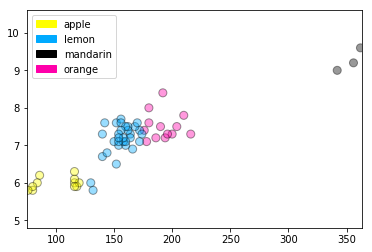

In [52]:
plot_labelled_scatter(X,kmeans.labels_,['apple', 'lemon', 'mandarin', 'orange'])

0     1
1     1
2     1
3     2
4     2
5     2
6     2
7     2
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    3
25    3
26    3
27    3
28    3
29    3
30    3
31    3
32    3
33    3
34    3
35    3
36    3
37    3
38    3
39    3
40    3
41    3
42    3
43    4
44    4
45    4
46    4
47    4
48    4
49    4
50    4
51    4
52    4
53    4
54    4
55    4
56    4
57    4
Name: fruit_label, dtype: object